# Implementing data vis functions

In [1]:
cd ~/Desktop/Repositories/Bioanalysis/bioreactor_results

C:\Users\agilman\Desktop\Repositories\Bioanalysis\bioreactor_results


In [2]:
%run ./BSRplots.py

In [3]:
cd ~/Desktop

C:\Users\agilman\Desktop


In [4]:
df = pd.read_csv("compiled_data.txt", delimiter = "\t", encoding = 'unicode_escape')
df = calc_qp(df)

In [5]:
#Optional cell to run, adjusting legend labels
lgnd = {"R0007":"Perfusion", "R0008":"Perfusion, initial",
        "R0009":"Fed-Batch", "R0010":"Fed-Batch",
        "R0011":"Perfusion,", "R0012":"FB, control",
        "R0013": "FB, 5E10 inoc", "R0014": "FB, 5E10 inoc (+CB4)",
        "R0015": "Perfusion, improved", "R0016":"Perfusion, 50kDa",
       "R0017":"Fed-Batch, control", "R0018":"Fed-Batch, 5E10 inoc"}

In [6]:
list_BSR = ["R0015", "R0017"]

#["R0012", "R0013", "R0014", "R0017"]           2x2 comparison with low and high seed inco +/- CB4

In [ ]:
fig1 = ['VCD', 'Viability', 'Titer']
fig2 = ['VCD', 'Viability', 'Titer', "Qp"]
fig3 = ['Gluc', 'Lac',"Osm",'PCO2']
fig4 = ['Gln', 'Glu','pH','NH4+']
fig5 = ['Na+', 'K+', 'Ca++']

list_3pane = [fig1, fig5]
list_4pane = [fig2, fig3, fig4]


In [ ]:
for i in list_3pane:
    plot_3by1(list_BSR, i, df, legend = lgnd, xmax = 14)

In [ ]:
for i in list_4pane:
    plot_2by2(list_BSR, i, df, legend = lgnd, xmax = 4.5)

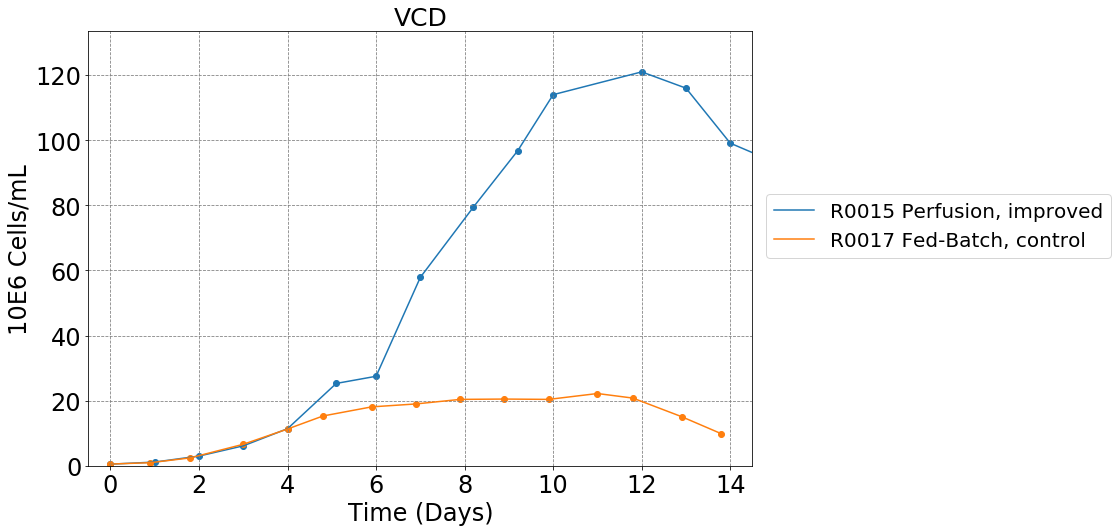

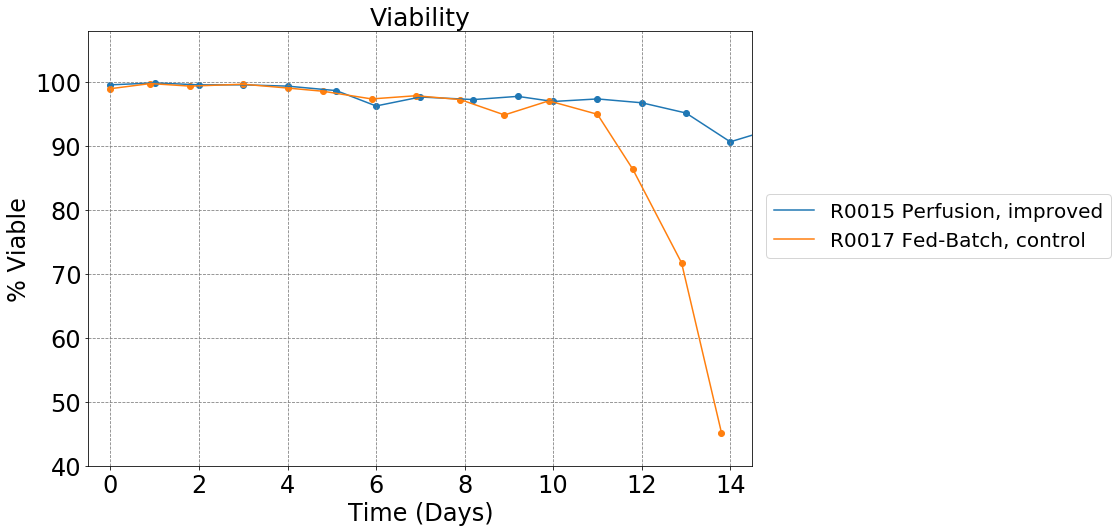

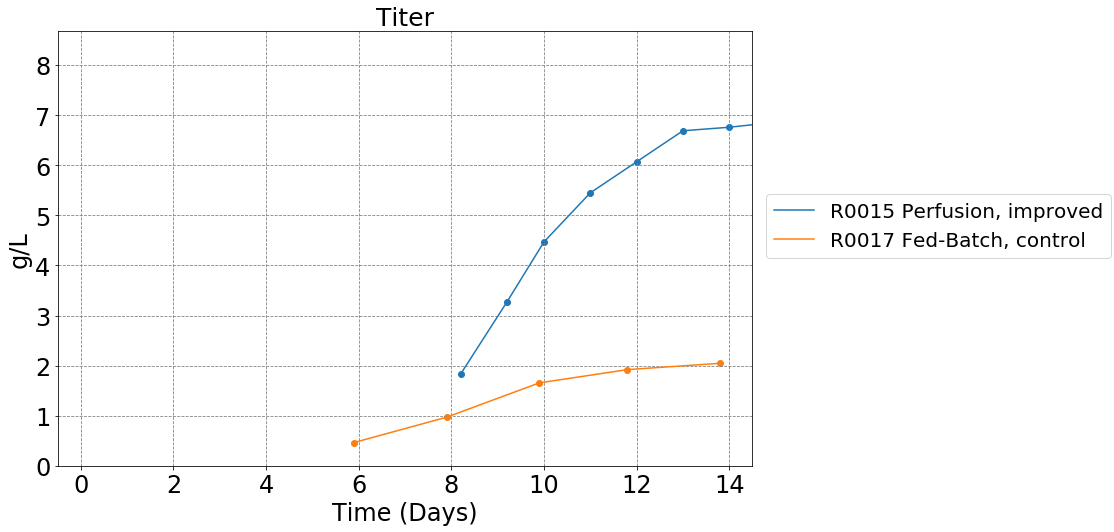

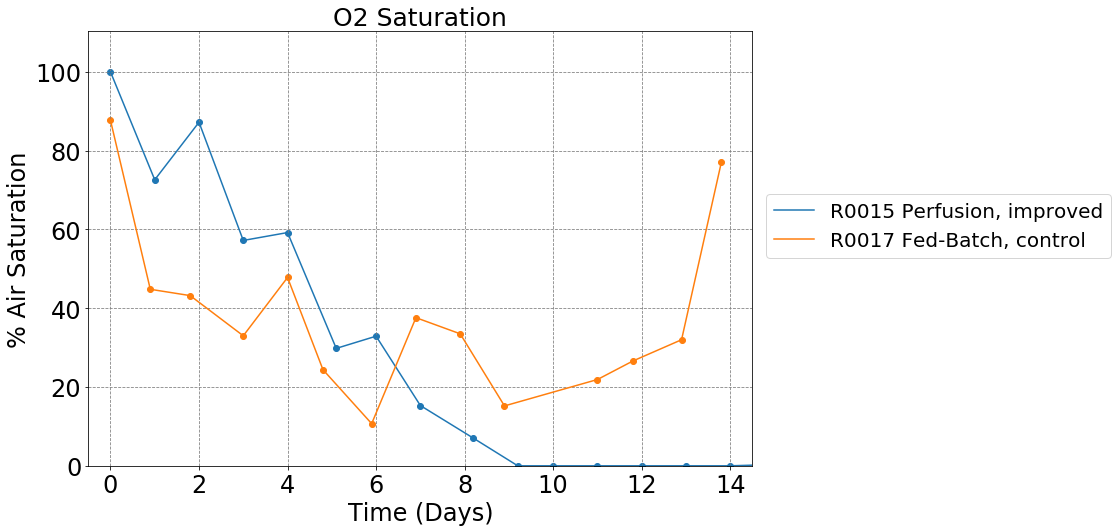

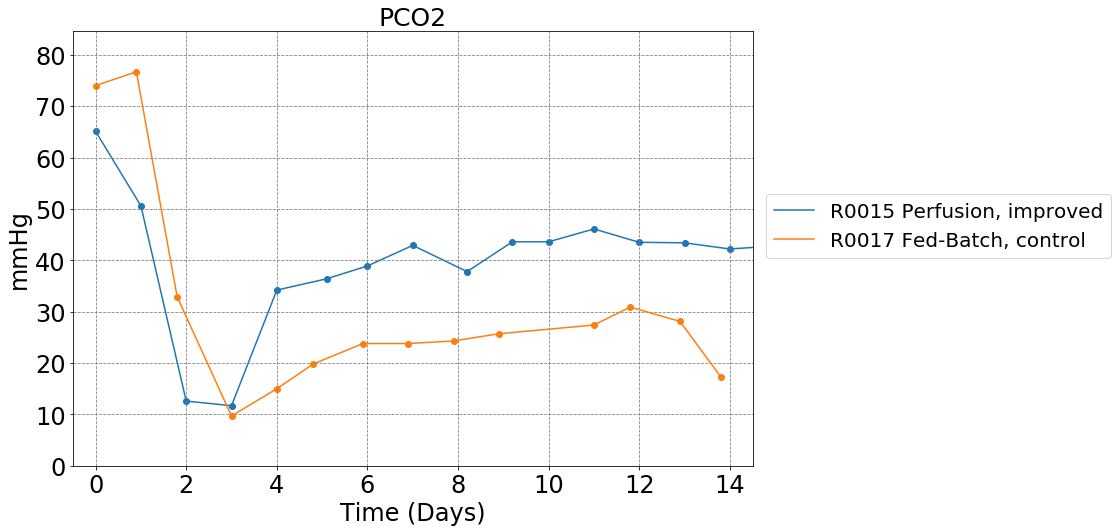

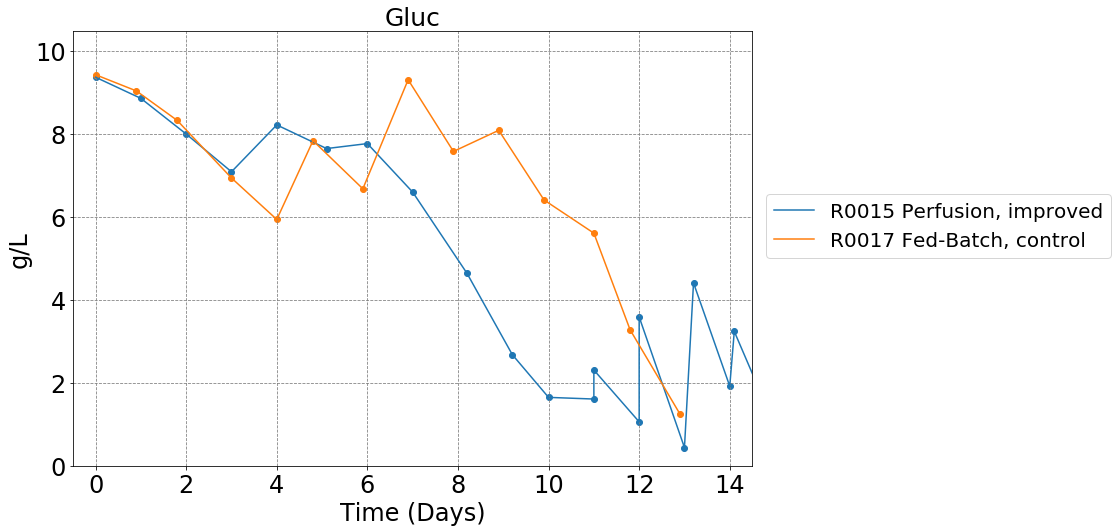

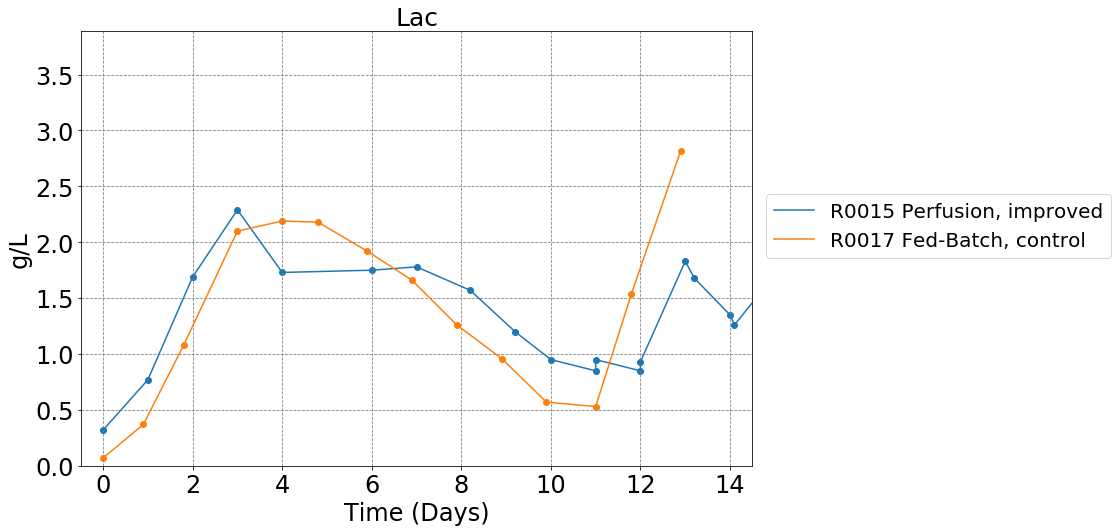

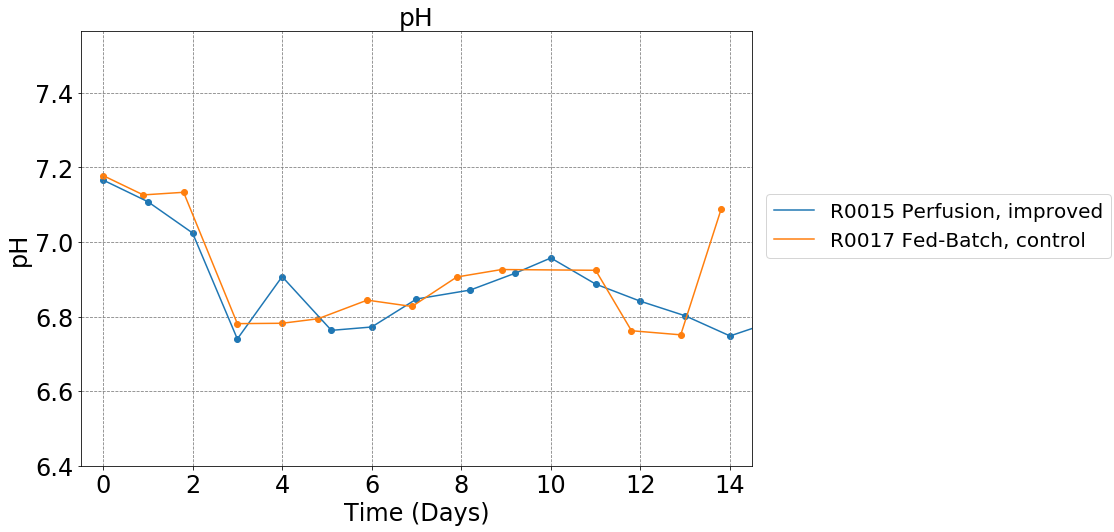

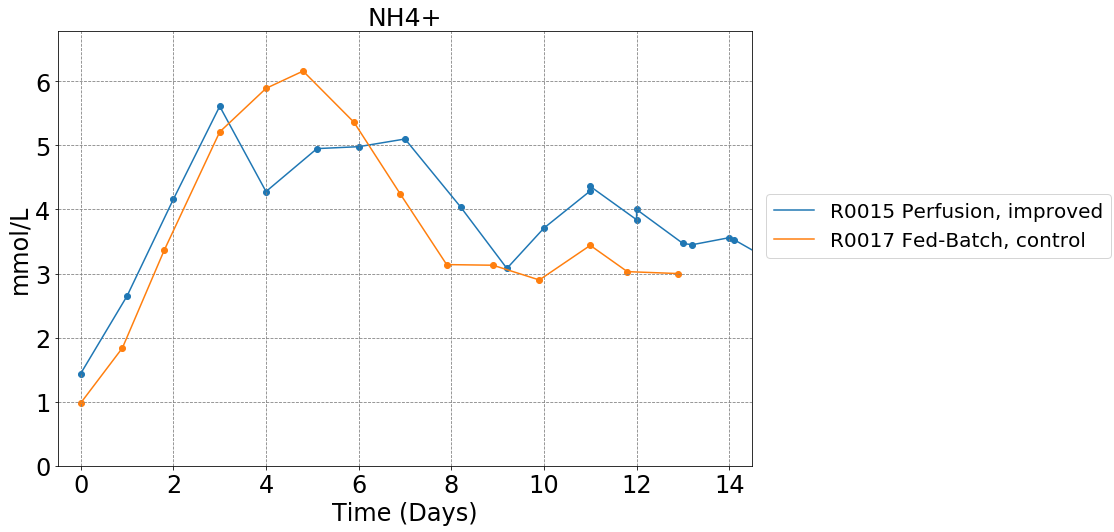

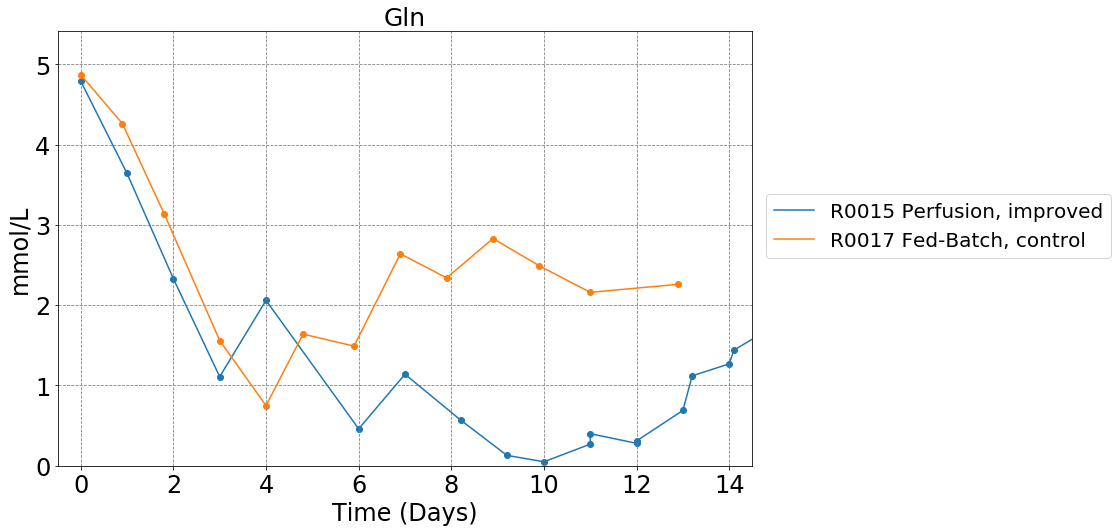

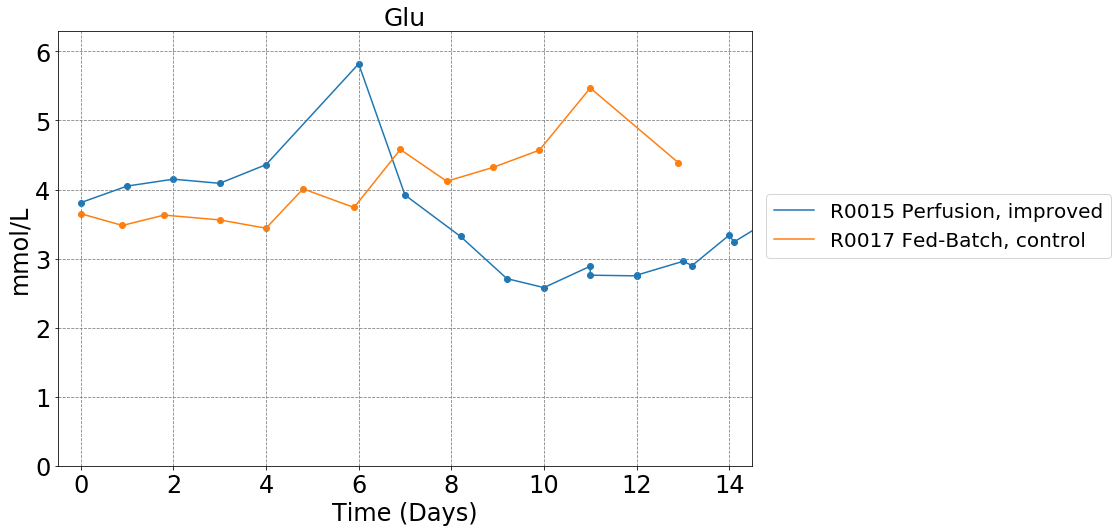

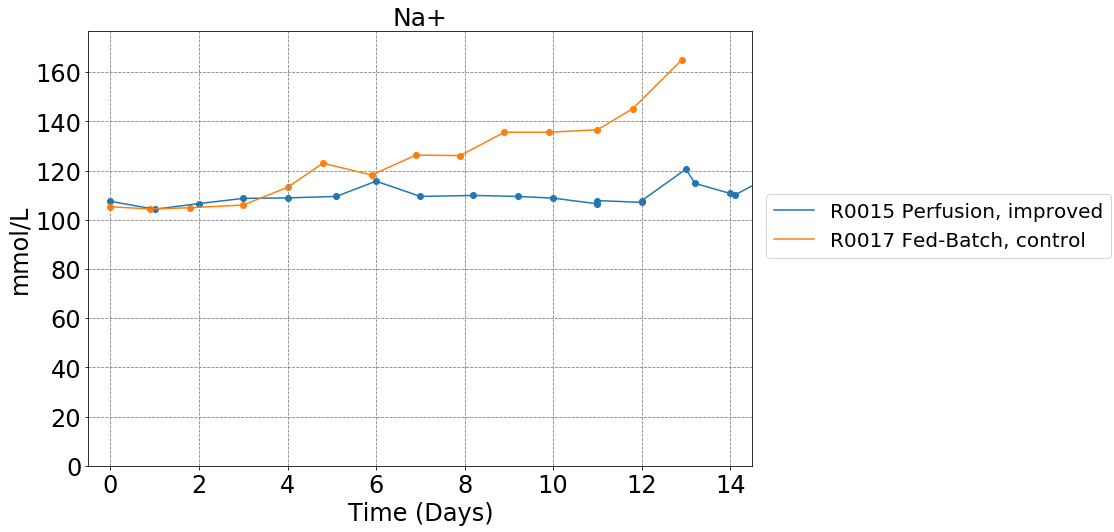

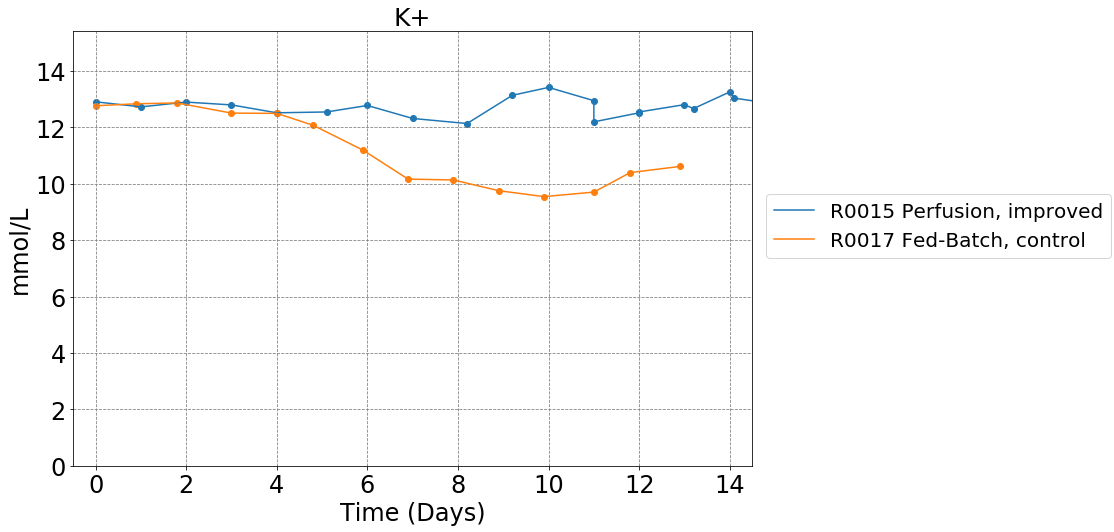

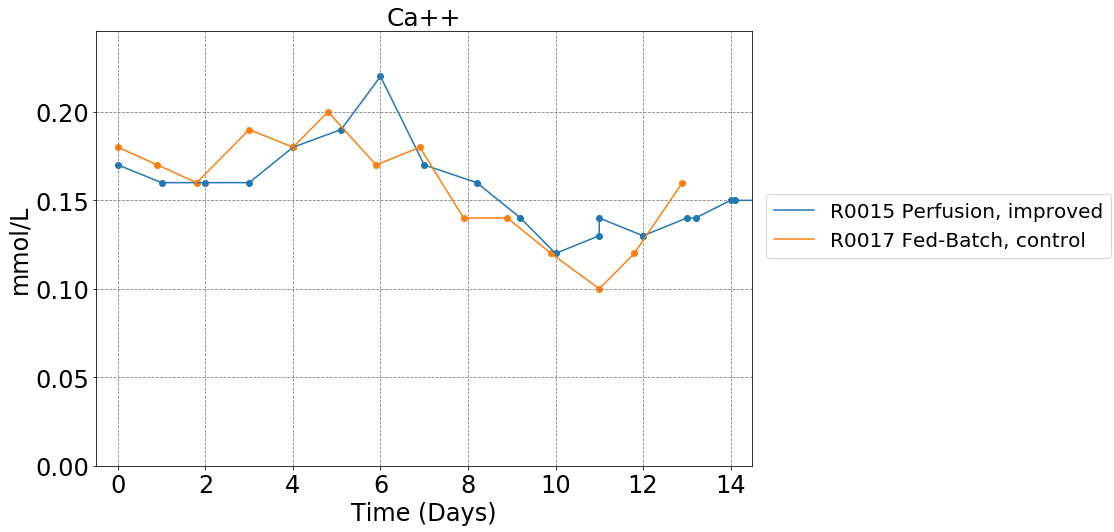

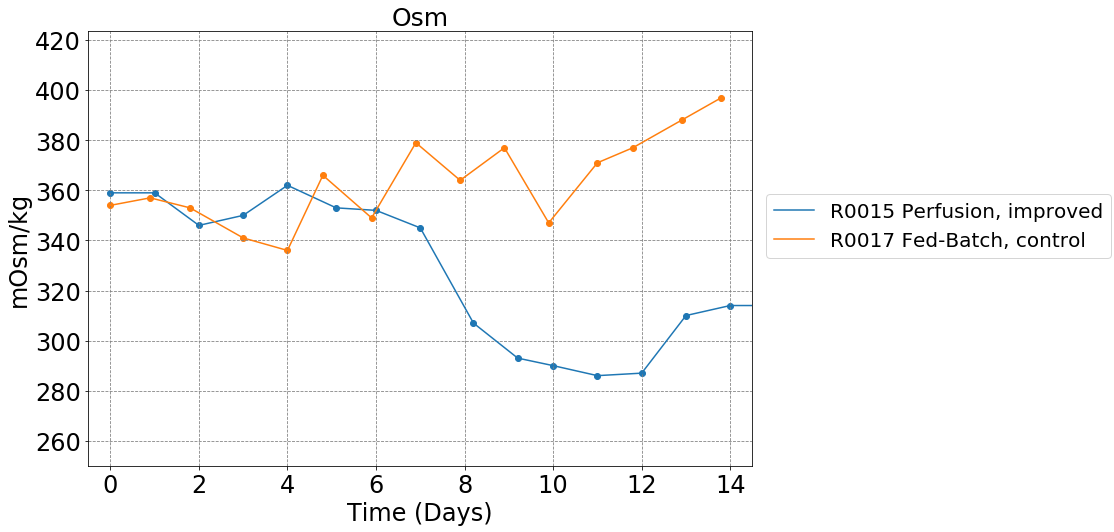

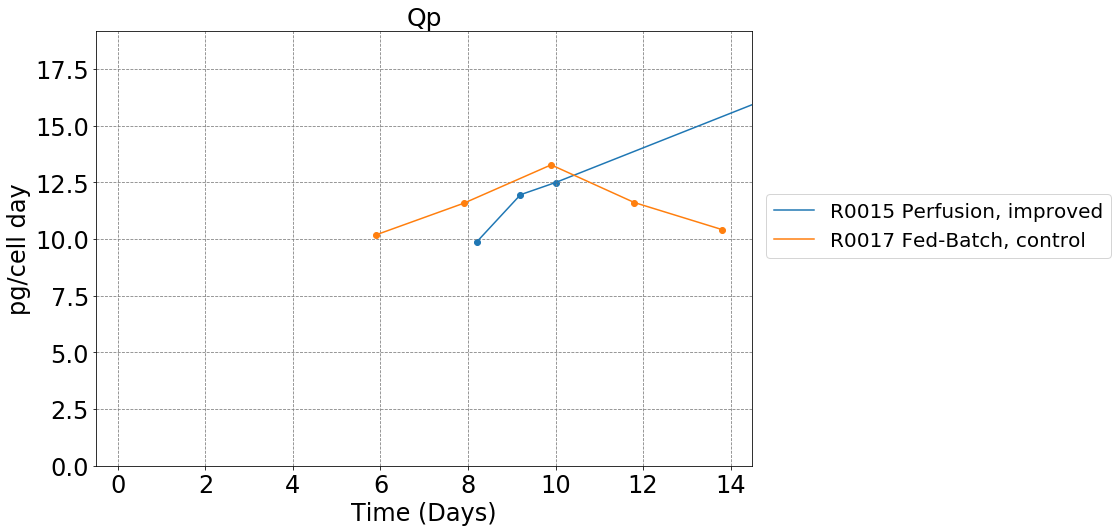

In [7]:
clms_list = ['VCD', 'Viability', 'Titer', 'O2 Saturation', 'PCO2', 'Gluc', 'Lac', 'pH','NH4+','Gln', 'Glu',
        'Na+', 'K+', 'Ca++', "Osm", 'Qp']

for i in clms_list:
    plot_single(list_BSR, i, df, legend = lgnd)

In [ ]:
df[df["Sample ID"].isin(["R0012", "R0013"])].loc[:,["Runtime", "Titer","Sample ID"]]